# Market simulation

The purpose of this tutorial is to show a more in-depth guide on how to simulate a market using **Garpar**, along with all the available tweaks for the process.

Currently, the system supports market simulation using one of the following distributions: normal, uniform, or Lévy stable. We will use the normal distribution for this tutorial.

We can run our first simulation by doing the following:

In [2]:
from garpar.datasets.risso import make_risso_normal

make_risso_normal()

Stocks,"S0[W 1.0, H 0.5]","S1[W 1.0, H 0.5]","S2[W 1.0, H 0.5]","S3[W 1.0, H 0.5]","S4[W 1.0, H 0.5]","S5[W 1.0, H 0.5]","S6[W 1.0, H 0.5]","S7[W 1.0, H 0.5]","S8[W 1.0, H 0.5]","S9[W 1.0, H 0.5]"
Days,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.965358,100.052343,100.251515,99.807558,100.009092,99.958433,99.985411,99.858311,100.047173,100.213897
2,100.074352,99.877514,100.494993,99.913432,100.087472,99.803087,100.115520,100.117099,100.121274,100.678138
3,99.825669,99.720272,100.338060,99.841628,100.025909,99.979019,100.566040,100.153340,99.893237,100.821050
4,99.614008,99.772954,100.572101,100.230073,100.023780,99.700143,100.444925,100.257098,100.082200,101.060726
...,...,...,...,...,...,...,...,...,...,...
361,94.406682,98.738347,102.684750,105.592761,105.677143,98.127520,102.073113,107.989557,103.441220,104.749249
362,94.629817,98.821850,102.524101,105.785074,106.009518,98.197596,102.124492,108.041594,103.402297,104.664806
363,94.486051,98.539241,102.632001,105.788199,106.359521,98.256167,101.848365,108.224205,103.420901,104.413670


By default, the simulation generates **10 stocks** with **365 days** of prices for each one. These prices follow the same distribution.

For this tutorial, we will focus on three sections of the `StocksSet`:

1. Entropy (`H`): Located in the top section, representing the entropy of the prices of each stock. By default, this value is `0.5`.
2. Stock Prices: The section that displays the value of each stock for each day.
3. Market Data: Found at the bottom, this section includes:
   - Total days
   - Number of stocks
   - Window size (we will explain its significance as we progress).

## Parameters of a Simulation

There are several parameters that influence a simulation. This section will demonstrate how each parameter affects the results.

Let's start with a simple example. Suppose we want to simulate **5 stocks** over **10 days**, each starting at a price of `110`. This can be achieved with the following function call:

In [3]:
make_risso_normal(days=10, stocks=5, price=110)

Stocks,"S0[W 1.0, H 0.5]","S1[W 1.0, H 0.5]","S2[W 1.0, H 0.5]","S3[W 1.0, H 0.5]","S4[W 1.0, H 0.5]"
Days,,,,,
0,110.000000,110.000000,110.000000,110.000000,110.000000
1,110.091548,109.664713,110.290925,109.905498,109.969999
2,110.141786,109.758743,110.535911,110.089175,109.791573
3,110.209570,109.917389,110.372441,110.328789,109.984120
4,109.987339,110.104664,110.644105,110.378700,110.326745
5,109.779135,109.909183,110.940142,110.206187,110.450940
6,110.023198,110.387460,111.163012,110.124732,110.117643
7,110.199964,110.741892,111.102423,110.436996,110.181715
8,110.284767,111.085849,110.929682,110.418111,110.121974


Sometimes, we might want a more 'controlled' or even deterministic environment. We can achieve this by using a seed. The `random_state` parameter represents this seed, as shown in the following example:

In [4]:
make_risso_normal(days=10, stocks=5, random_state=42)

Stocks,"S0[W 1.0, H 0.5]","S1[W 1.0, H 0.5]","S2[W 1.0, H 0.5]","S3[W 1.0, H 0.5]","S4[W 1.0, H 0.5]"
Days,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.805864,100.064231,99.673520,100.099536,100.350197
2,99.877569,99.848907,99.640754,100.092772,100.502180
3,100.117469,99.714975,99.932985,100.085532,100.434143
4,99.724941,99.703926,100.038811,100.170518,100.248995
5,99.980227,99.673678,100.193293,100.022085,100.306951
6,100.107440,99.510781,99.973090,100.146914,100.683379
7,100.406530,99.477164,100.178258,100.441258,100.525237
8,100.554192,99.044405,100.252693,100.414589,100.581188


Feel free to try this with different values of `random_state`.

Now, let’s talk about the `H` value. This represents the entropy of a given stock, which can be thought of as the informational efficiency of the market. In simple terms, it describes how quickly information spreads throughout the market. Entropy is essentially a measure of unpredictability. When the entropy value is closer to 1.0, it means that the chances of winning or losing on any given day are nearly equal—making the stock's movements highly unpredictable. On the other hand, when entropy is closer to 0.0, it suggests that the chances of winning or losing are imbalanced, meaning the stock's behavior is more predictable or skewed in one direction.

To test this, lets try using a high entropy value and a low entropy value. This will show how this concept is visualized:

<Axes: title={'center': 'Price'}, xlabel='Days'>

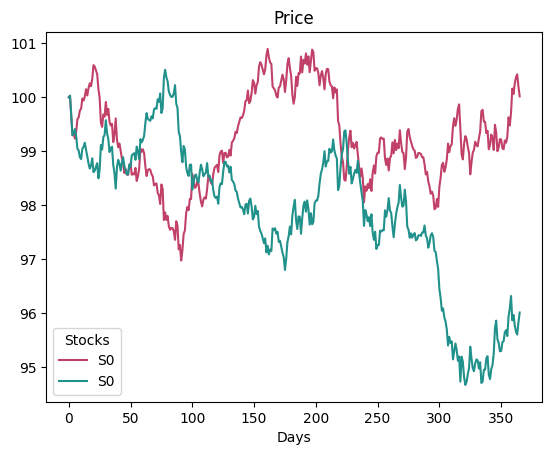

In [5]:
make_risso_normal(stocks=1, entropy=1.0, random_state=702).plot.line(
    palette="flare"
)
make_risso_normal(stocks=1, entropy=0.0, random_state=702).plot.line(
    palette="viridis"
)

We can see that the stock following the red line doesn't show a clear, sustained trend of either dropping or rising, while the one with the teal color tends to drop over time.

> Note that we used a method `line` to create the graph, the attribute `plot` is known as an _accessor_ and we will explain them in one of the lasts sections of this tutorial.

Another important parameter is the `window_size`, which represents how long an investor will hold a stock. By default, we've set it to 5 days. This value is combined with the entropy to determine the loss probability each day. So for example, lets assume the same entropy value and see how the stocks values diverge:

<Axes: title={'center': 'Price'}, xlabel='Days'>

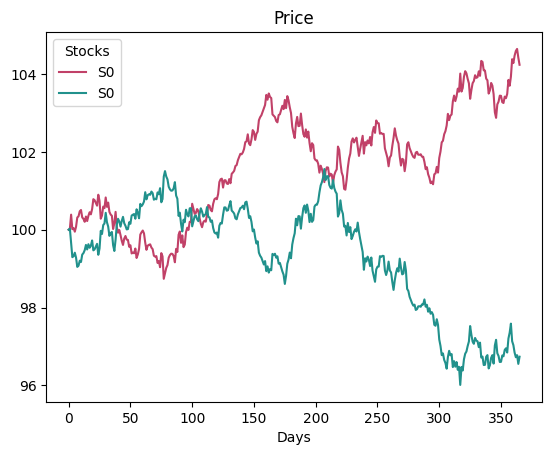

In [6]:
make_risso_normal(
    stocks=1, entropy=0.5, window_size=5, random_state=702
).plot.line(palette="flare")
make_risso_normal(
    stocks=1, entropy=0.5, window_size=7, random_state=702
).plot.line(palette="viridis")

As we can see, the simulation produces different results based on the `window_size`.

We’ve also included some validations. For example, if we try to simulate a market with fewer `days` than the `window_size`, the simulation will fail. In such cases, we issue a warning to inform the user about what's happening:

In [7]:
make_risso_normal(days=10, stocks=4, random_state=42, window_size=20)

ValueError: 'window_size' must be in the interval (0, days]

As we mentioned, there are other distributions that a market prices follow. Feel free to test them. In the current version we have the functions `make_risso_unifom` and `make_risso_levy_stable` appart from the `make_risso_normal` shown in the previous steps.

There are other parameters that can be used in a simulation, such as `n_jobs`, which represents the number of concurrent 'workers' used for the simulation, or the `verbose` parameter, which, when set to `1`, shows details of such 'workers'.

## Combining simulations

We can use the `make_multisector` function to run the simulation with different distribution or simulation values at the same time. For example, if we want to see how the prices change with a particular seed and the three distributions, we can do something like the following:

In [ ]:
from garpar.datasets import (
    RissoUniform,
    RissoNormal,
    RissoLevyStable,
    make_multisector,
)

make_multisector(
    RissoNormal(random_state=42),
    RissoUniform(random_state=42),
    RissoLevyStable(random_state=42),
    days=10,
    stocks=3,
)

Stocks,"rissonormal_S0[W 1.0, H 0.5]","rissouniform_S0[W 1.0, H 0.5]","rissolevystable_S0[W 1.0, H 0.5]"
Days,,,
0,100.000000,100.000000,100.000000
1,99.805864,97.632493,99.997836
2,99.877569,101.788730,100.004509
3,100.117469,105.742868,100.010409
4,99.724941,100.787672,100.007141
5,99.980227,105.112878,100.025434
6,100.107440,108.965867,100.037966
7,100.406530,113.877904,100.042125
8,100.554192,117.363331,100.060340


The classes RissoUniform, RissoNormal and RissoLevyStable are known as makers in our system. Objects of these classes are in charge of creating `StocksSet`, the difference between each one is the distribution a generated `StocksSet` prices follow.

## The accessors

The accessors are properties that allow an object to be treated as a particular tipe. When we introduce the entropy value, we utilized the property `plot`, this property had an interface inside to make different plots of the `StocksSet`. We used only the line plot, but if we want to make a boxplot; we will simply make something like this:

<Axes: title={'center': 'Price'}, xlabel='Stocks'>

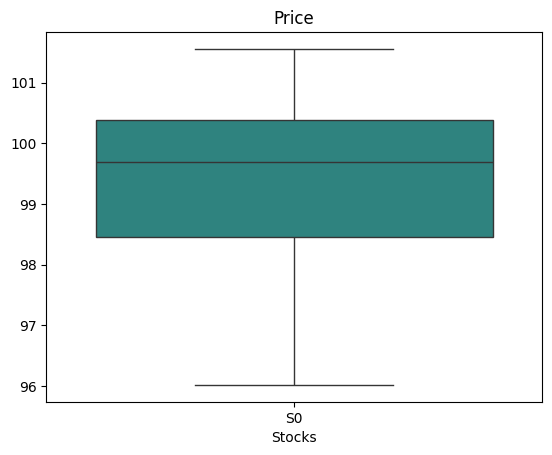

In [ ]:
make_risso_normal(
    stocks=1, entropy=0.5, window_size=7, random_state=702
).plot.box(palette="viridis")

There are many other accessors. Feel free to look in the **API section** for the documentation.

We have concluded the tutorial about market simulations, if you want to check particular details, feel free to consult the API section, where we published every function prototype alongside its documentation!

Now that you know how the simulation works, we recommend you to follow [this tutorial](portfolio_optimization.ipynb).